In [1]:
import tensorflow as tf

## 데이터 부르기

In [2]:
import os
import zipfile
DATA_IN_PATH = './data_in/'
file_list = os.listdir(DATA_IN_PATH)
print(file_list)
for file in file_list:
    zipRef = zipfile.ZipFile(DATA_IN_PATH + file, 'r')
    zipRef.extractall(DATA_IN_PATH)
    zipRef.close()

['labeledTrainData.tsv', 'labeledTrainData.tsv.zip', 'testData.tsv', 'testData.tsv.zip', 'unlabeledTrainData.tsv', 'unlabeledTrainData.tsv.zip']


BadZipFile: File is not a zip file

## 데이터 확인

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
train_data = pd.read_csv(DATA_IN_PATH+"labeledTrainData.tsv", header=0, delimiter='\t', quoting=3)

In [7]:
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


> 1. 데이터 크기 <br>
> 2. 데이터의 개수 <br>
> 3. 각 리뷰의 문자 길이 분포 <br>
> 4. 많이 사용된 단어 <br>
> 5. 긍정, 부정 데이터의 분포
> 6. 각 리뷰의 단어 개수 분포 <br>
> 7. 특수 문자 및 대 소문자 소문자 비율 <br>

#### 파일데이터 사이즈

In [8]:
print('file size : ')
for file in os.listdir(DATA_IN_PATH):
    if 'tsv' in file and 'zip' not in file:
        file_name = file.ljust(30)
        file_size = str(round(os.path.getsize(DATA_IN_PATH + file )/1000000, 2))
        print(file_name + file_size + 'MB')

file size : 
labeledTrainData.tsv          33.56MB
testData.tsv                  32.72MB
unlabeledTrainData.tsv        67.28MB


In [9]:
print ('전체 학습데이터 사이즈 : {}'.format(len(train_data)))

전체 학습데이터 사이즈 : 25000


In [10]:
train_length = train_data['review'].apply(len)
train_length.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

Text(0,0.5,'Number of review')

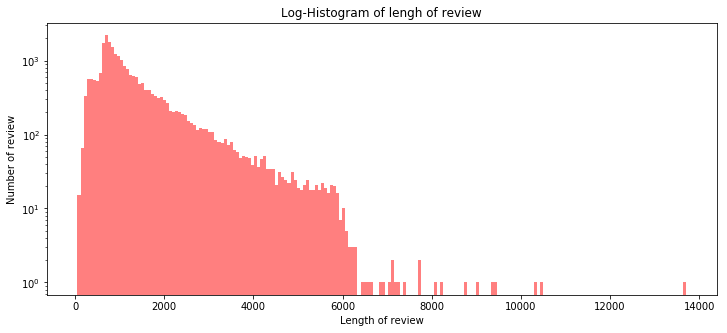

In [11]:
plt.figure(figsize=(12,5))
plt.hist(train_length, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of lengh of review')
plt.xlabel('Length of review')
plt.ylabel('Number of review')

In [25]:
def print_data_info(data_name, data):
    print(data_name + ' 최대값: {}'.format(np.max(data)))
    print(data_name + ' 최솟값: {}'.format(np.min(data)))
    print(data_name + ' 평균값: {}'.format(np.mean(data)))
    print(data_name + ' 표준편차: {}'.format(np.std(data)))
    print(data_name + ' 중간값; {}'.format(np.median(data)))
    print(data_name + ' 제 1사분위: {}'.format(np.percentile(data, 25)))
    print(data_name + ' 제 3사분위: {}'.format(np.percentile(data, 75)))

In [26]:
print_data_info('리뷰 길이', train_length)

리뷰 길이 최대값: 13710
리뷰 길이 최솟값: 54
리뷰 길이 평균값: 1329.71056
리뷰 길이 표준편차: 1005.2191407969154
리뷰 길이 중간값; 983.0
리뷰 길이 제 1사분위: 705.0
리뷰 길이 제 3사분위: 1619.0


{'boxes': [<matplotlib.lines.Line2D at 0x9583d0a470>],
 'caps': [<matplotlib.lines.Line2D at 0x9583d0af98>,
 'fliers': [<matplotlib.lines.Line2D at 0x9583d191d0>],
 'means': [<matplotlib.lines.Line2D at 0x9583d10cf8>],
 'medians': [<matplotlib.lines.Line2D at 0x9583d10898>],
 'whiskers': [<matplotlib.lines.Line2D at 0x9583d0a6a0>,
  <matplotlib.lines.Line2D at 0x9583d0ab38>]}

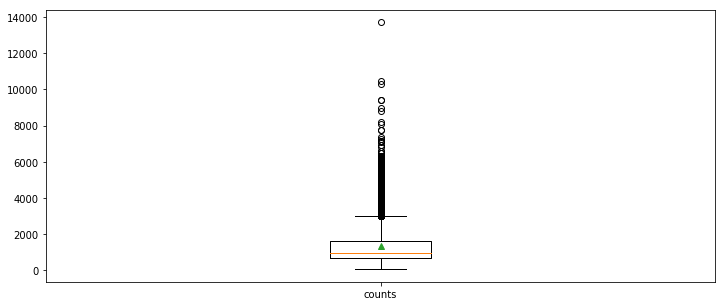

In [13]:
plt.figure(figsize=(12,5))
plt.boxplot(train_length, labels=['counts'], showmeans=True)

#### WordCloud 

(-0.5, 799.5, 599.5, -0.5)

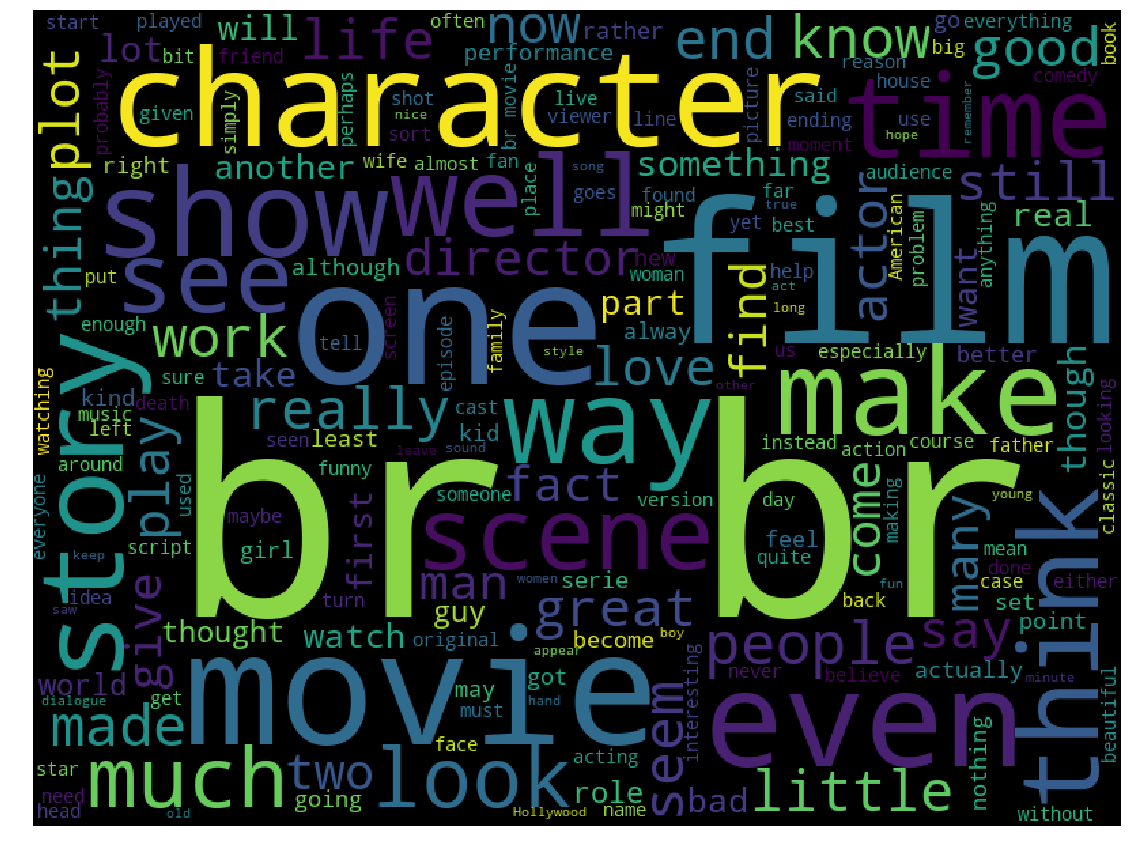

In [14]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(train_data['review']))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

#### Seaborn 시각화

긍정 리뷰 개수: 12500
부정 리뷰 개수: 12500


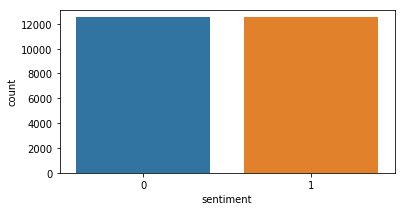

In [15]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_data['sentiment'])
print('긍정 리뷰 개수: {}'.format(train_data['sentiment'].value_counts()[1]))
print('부정 리뷰 개수: {}'.format(train_data['sentiment'].value_counts()[0]))

#### 각 review 의 단어수 출력

In [17]:
train_word_counts = train_data['review'].apply(lambda x: len(x.split(' ')))
train_word_counts.head()

0    433
1    158
2    378
3    379
4    367
Name: review, dtype: int64

Text(0,0.5,'Number of reviews')

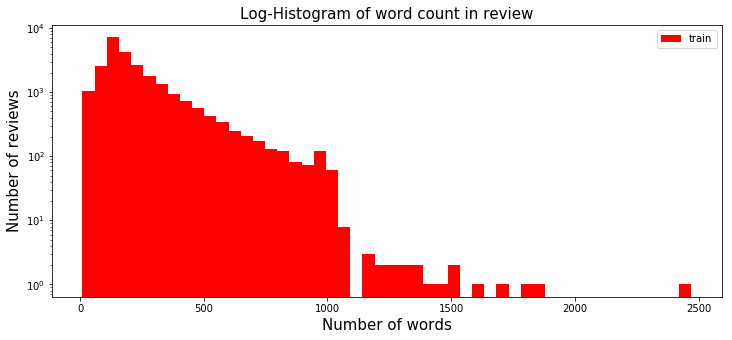

In [18]:
plt.figure(figsize=(12,5))
plt.hist(train_word_counts, bins=50, facecolor='r', label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

In [27]:
print_data_info('리뷰 단어', train_word_counts)

리뷰 단어 최대값: 2470
리뷰 단어 최솟값: 10
리뷰 단어 평균값: 233.78624
리뷰 단어 표준편차: 173.74237015380743
리뷰 단어 중간값; 174.0
리뷰 단어 제 1사분위: 127.0
리뷰 단어 제 3사분위: 284.0
